<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [PER57] - Perceptron Model 1957
<!-- DESC --> A simple perceptron, with the IRIS dataset.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Implement a historical linear classifier with a historical dataset !
 - The objective is to predict the type of Iris from the size of the leaves.
 - Identifying its limitations  

The [IRIS dataset](https://archive.ics.uci.edu/ml/datasets/Iris) is probably one of the oldest datasets, dating back to 1936 .

## What we're going to do :
 - Retrieve the dataset, via scikit learn
 - training and classifying

## Step 1 - Import and init

In [1]:
import numpy as np
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron

import matplotlib.pyplot as plt
import matplotlib

import os,sys

sys.path.append('..')
import fidle.pwk as ooo

place, datasets_dir = ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.57 DEV
Run time             : Wednesday 9 September 2020, 14:42:06
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Current place        : Fidle at IDRIS
Dataset dir          : /gpfswork/rech/mlh/commun/datasets
Update keras cache   : Done


## Step 2 - IRIS Data Recovery

Retrieve a dataset : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  
About the datesets : http://scikit-learn.org/stable/datasets/index.html  

Data fields (X) :
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm  

Class (y) :
- 0 : class 0=Iris-Setosa, 1=Iris-Versicolour, 2=Iris-Virginica


In [2]:
X0,y0 = load_iris(return_X_y=True)

X = X0[:, (2,3)]     # We only keep fields 2 and 3
y = y0.copy()

y[ y0==0 ] = 1       # 1 = Iris setosa
y[ y0>=1 ] = 0       # 0 = not iris setosa

print('Examples :')
print('Length   Width   Iris Setosa (0/1)')
print('  x1       x2          y')
for i in range(45,55):
    print(f" {X[i][0]:3.1f}      {X[i][0]:3.1f}          {y[i]}")
print(f'\nX shape : {X.shape}')
print(f'y shape : {y.shape}')

Examples :
Length   Width   Iris Setosa (0/1)
  x1       x2          y
 1.4      1.4          1
 1.6      1.6          1
 1.4      1.4          1
 1.5      1.5          1
 1.4      1.4          1
 4.7      4.7          0
 4.5      4.5          0
 4.9      4.9          0
 4.0      4.0          0
 4.6      4.6          0

X shape : (150, 2)
y shape : (150,)


## Step 3 - Get a perceptron

In [3]:
pct = Perceptron(max_iter=100, random_state=82, tol=0.01)
pct.fit(X, y)

Perceptron(max_iter=100, random_state=82, tol=0.01)

## Step 4 - Prédictions

In [4]:
X_pred = np.array( [ [2.0, 0.5], [5.0, 1.5] ] )

y_pred = pct.predict(X_pred) 

for i,x in enumerate(X_pred):
    print(f'Petal : length={x[0]}, width={x[0]}  => is setosa : {y_pred[i]}')


Petal : length=2.0, width=2.0  => is setosa : 1
Petal : length=5.0, width=5.0  => is setosa : 0


## Step 5 - Visualisation

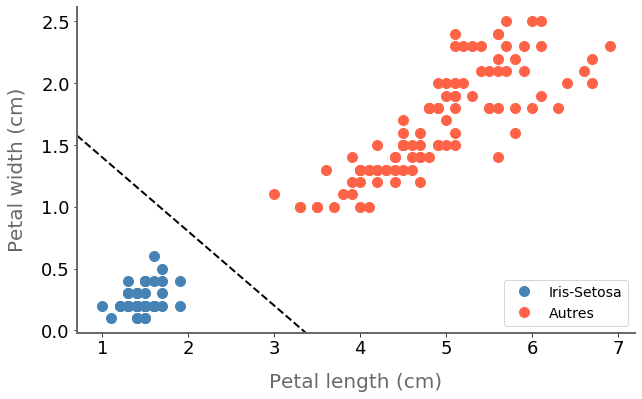

In [5]:
a = -pct.coef_[0][0] / pct.coef_[0][1]
b = -pct.intercept_ / pct.coef_[0][1]
box=[X.min(axis=0)[0],X.max(axis=0)[0],X.min(axis=0)[1],X.max(axis=0)[1]]
mx=(box[1]-box[0])/20
my=(box[3]-box[2])/20
box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

fig, axs = plt.subplots(1, 1)
fig.set_size_inches(10,6)
axs.plot(X[y==1, 0], X[y==1, 1], "o", label="Iris-Setosa")
axs.plot(X[y==0, 0], X[y==0, 1], "o", label="Autres")
axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
axs.legend(loc="lower right", fontsize=14)
axs.set_xlim(box[0],box[1])
axs.set_ylim(box[2],box[3])

plt.show()

---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>